## Location optimization for establishing a new Chinese restaurant in Vancouver

### Introduction :
Vancouver city is one of the big cities in Canada which located in the west. Vancouver CSD (Census Subdivision), Vancouver city consists of 22 neighborhoods. Besides, Vancouver city is a multicultural city. It is formed by a mix of people who are different races, having different religions, ethnicities, and cultural.

### Business problem :
There are 167180 Chinese people staying in Vancouver city. Thus, this makes establishing a Chinese restaurant a good choice of investment. As a invester, it is always important to find a optimal place to establish a Chinese restaurant. In this case, the neighborhood of Vancouver CSD need to be scanned through to identify establishing a Chinese restaurant in which area will higher business opportunity and lesser competition. This project is targeted to invester who would like to establish a new Chinese restaurant in Vancouver CSD.

### Data :
In order to establish a Chinese restaurant in Vancouver CSD, we will be scrapping and getting the data from the following :

1) City of Vancouver census local area profiles 2016 :- 

https://opendata.vancouver.ca/explore/dataset/census-local-area-profiles-2016/information/

Example : A) There are 22 neighborhoods in Vancouver CSD.

B) There are 3045 Chinese people staying in Arbutus Ridge neighborhood.

2) Latitude and longitude of neighborhood in Vancouver city can be gotten through usage of python library Geocoder. Refer to the following link for more information :-

https://geocoder.readthedocs.io/

Example : The latitude and longitude of Arbutus- Ridge neighborhood are 49.246305, -123.159636.

3) Foursquare API to explore the famous venues especially Chinese restaurant in the neighborhood of Vancouver CSD. One will need to register her developer account from the following URL in order to access to Foursquare API.

https://developer.foursquare.com/

Example : To explore Arbutus Ridge neighborhood and identify the number of Chinese restaurant.

In [1]:
# Install all required packages 
# get_ipython().system(u' pip install --upgrade pip')
# get_ipython().system(u' pip install beautifulsoup4')
!pip install beautifulsoup4
!pip install lxml
!pip install et_xmlfile
!pip install requests
!conda install -c conda-forge geocoder --yes
!conda install -c conda-forge folium=0.5.0 --yes
!conda install -c conda-forge geopy --yes
print("Installation completed.")

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.

Installation completed.


In [2]:
# Import all the related libraries
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis

import requests # library to handle requests

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# import k-means from clustering stage
from sklearn.cluster import KMeans

# Import geocoder to convert an address into latitude and longitude values
import geocoder

# Import geopy.geocoders.Nominatim in order to convert an address into latitude and longitude values
from geopy.geocoders import Nominatim 

import folium # map rendering library

from bs4 import BeautifulSoup

# Import K-mean
from sklearn.cluster import KMeans

# Import StandardScaler
from sklearn.preprocessing import StandardScaler

print('Libraries imported.')

Libraries imported.


### Scrap and get the data from the web

In [3]:
vancouver_profile = pd.read_excel('https://webtransfer.vancouver.ca/opendata/xls/CensusLocalAreaProfiles2016.xls', skiprows = 4, index_col ='ID')
# vancouver_profile = pd.read_excel("CensusLocalAreaProfiles2016.xls", skiprows = 4, index_col ='ID')
vancouver_profile

,Variable,Arbutus-Ridge,Downtown,Dunbar-Southlands,Fairview,Grandview-Woodland,Hastings-Sunrise,Kensington-Cedar Cottage,Kerrisdale,Killarney,...,Riley Park,Shaughnessy,South Cambie,Strathcona,Sunset,Victoria-Fraserview,West End,West Point Grey,Vancouver CSD,Vancouver CMA
ID,,,,,,,,,,,,,,,,,,,,,
1,Total - Age groups and average age of the popu...,15295.0,62030.0,21425.0,33620.0,29175.0,34575.0,49325.0,13975.0,29325.0,...,22555.0,8430.0,7970.0,12585.0,36500.0,31065.0,47200.0,13065.0,631485.0,2463430.0
2,0 to 14 years,2015.0,4000.0,3545.0,2580.0,3210.0,4595.0,7060.0,1880.0,4185.0,...,3415.0,1175.0,1105.0,1065.0,5460.0,3790.0,1945.0,1900.0,70530.0,362110.0
3,0 to 4 years,455.0,2080.0,675.0,1240.0,1320.0,1510.0,2515.0,430.0,1300.0,...,1175.0,270.0,360.0,360.0,1695.0,1175.0,965.0,420.0,24615.0,116270.0
4,5 to 9 years,685.0,1105.0,1225.0,760.0,1025.0,1560.0,2390.0,600.0,1400.0,...,1160.0,405.0,365.0,365.0,1780.0,1210.0,560.0,670.0,22905.0,122730.0
5,10 to 14 years,880.0,810.0,1650.0,580.0,865.0,1525.0,2160.0,845.0,1485.0,...,1080.0,500.0,375.0,340.0,1985.0,1410.0,415.0,810.0,23010.0,123110.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5489,Non-Aboriginal,360.0,1300.0,335.0,505.0,305.0,750.0,1125.0,360.0,760.0,...,350.0,120.0,115.0,125.0,850.0,945.0,915.0,215.0,13300.0,46615.0
5490,English and French,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,15.0
5491,English and non-official language,10.0,10.0,0.0,0.0,0.0,15.0,20.0,10.0,20.0,...,0.0,0.0,0.0,0.0,10.0,30.0,0.0,0.0,190.0,580.0


ID 3080 shows the total population in Vancouver city's neighborhoods.

In [4]:
vancouver_profile.loc[3080][0:6]

Variable               Total - Visible minority for the population in...
Arbutus-Ridge                                                      15075
Downtown                                                           58855
Dunbar-Southlands                                                  21285
Fairview                                                           32725
Grandview-Woodland                                                 29005
Name: 3080, dtype: object

ID 3083 shows the population of Chinese people staying in Vanocuver city's neighborhoods.

In [5]:
vancouver_profile.loc[3083][0:6]

Variable                   Chinese
Arbutus-Ridge                 6970
Downtown                      9490
Dunbar-Southlands             6525
Fairview                      3865
Grandview-Woodland            3885
Name: 3083, dtype: object

ID 3963 shows the average households income for different neighborhoods in Vancouver city.

In [6]:
vancouver_profile.loc[3963][0:6]

Variable                 Average total income of households in 2015 ($)
Arbutus-Ridge                                                    124666
Downtown                                                          96632
Dunbar-Southlands                                                172768
Fairview                                                          93652
Grandview-Woodland                                                72585
Name: 3963, dtype: object

ID 3964 shows the median households income for different neighrborhoods in Vancouver CSD.

In [7]:
vancouver_profile.loc[3964][0:6]

Variable                 Median total income of households in 2015 ($)
Arbutus-Ridge                                                    71008
Downtown                                                         66583
Dunbar-Southlands                                               104450
Fairview                                                         69337
Grandview-Woodland                                               55141
Name: 3964, dtype: object

Create a dataframe to contain all the above data.

In [8]:
# Put all the data into a dataframe called neighborhood.
neighborhood = pd.DataFrame({'Neighborhood' : vancouver_profile.columns[1:23]})
neighborhood

,Neighborhood
0,Arbutus-Ridge
1,Downtown
2,Dunbar-Southlands
3,Fairview
4,Grandview-Woodland
5,Hastings-Sunrise
6,Kensington-Cedar Cottage
7,Kerrisdale
8,Killarney
9,Kitsilano


In [9]:
# Add total population, Chinese population into the neighborhood dataframe.
neighborhood["Total Population"] = vancouver_profile.loc[3080][1:23].to_numpy()
neighborhood["Chinese Population"] = vancouver_profile.loc[3083][1:23].to_numpy()
neighborhood["Percentage of Chinese Population"] = neighborhood["Chinese Population"] / neighborhood["Total Population"] * 100
neighborhood.drop(["Chinese Population"], axis=1, inplace=True)

In [10]:
# Add average household income and median household income into the neighborhood dataframe.
# neighborhood["Avg Household Income"] = vancouver_profile.loc[3963][1:23].to_numpy()
neighborhood["Median Household Income"] = vancouver_profile.loc[3964][1:23].to_numpy()
neighborhood

,Neighborhood,Total Population,Percentage of Chinese Population,Median Household Income
0,Arbutus-Ridge,15075,46.2355,71008
1,Downtown,58855,16.1244,66583
2,Dunbar-Southlands,21285,30.6554,104450
3,Fairview,32725,11.8105,69337
4,Grandview-Woodland,29005,13.3942,55141
5,Hastings-Sunrise,34115,38.4582,68506
6,Kensington-Cedar Cottage,48870,31.8396,70815
7,Kerrisdale,13895,46.3836,75419
8,Killarney,28930,40.3387,71559
9,Kitsilano,42755,8.45515,72839


Side note : 

Median household income is taken in consideration in this case as the mean household income is higher than median household income. This mean that the household income data is skewed. Taking median instead of mean value will be more appropriate.

In [11]:
# Create empty array for latitude and longitude.
latitude, longitude = [], []

In [12]:
for i in range(len(neighborhood)):
    
    geolocator = Nominatim(user_agent="vcv_explorer")
    g = geolocator.geocode('{}, Vancouver, Canada'.format(neighborhood['Neighborhood'][i]))

    # write latitude and longitude value into the latitude and longitude arrays 
    latitude.append(g.latitude)
    longitude.append(g.longitude)
    print(i)
print('completed')

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
completed


In [13]:
# alternative method to retrieve the latitude and longitude information using Geocoder and Arcgis API.

# remove ''' to use the code
'''
for i in range(len(neighborhood)):
    
    # initialize your variable to None
    lat_lng_coords = None

    # loop until you get the coordinates of local areas (neighborhoods) of Vancouver CSD
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, Vancouver, Canada'.format(neighborhood['Neighborhood'][i]))
        lat_lng_coords = g.latlng

    latitude.append(lat_lng_coords[0])
    longitude.append(lat_lng_coords[1])
    print(i)
print('completed')
''' # remove ''' to use the code

"\nfor i in range(len(neighborhood)):\n    \n    # initialize your variable to None\n    lat_lng_coords = None\n\n    # loop until you get the coordinates of local areas (neighborhoods) of Vancouver CSD\n    while(lat_lng_coords is None):\n        g = geocoder.arcgis('{}, Vancouver, Canada'.format(neighborhood['Neighborhood'][i]))\n        lat_lng_coords = g.latlng\n\n    latitude.append(lat_lng_coords[0])\n    longitude.append(lat_lng_coords[1])\n    print(i)\nprint('completed')\n"

In [14]:
# Add in the latitude and longitude into neighborhood dataframe.
neighborhood['Latitude'] = latitude
neighborhood['Longitude'] = longitude
neighborhood

,Neighborhood,Total Population,Percentage of Chinese Population,Median Household Income,Latitude,Longitude
0,Arbutus-Ridge,15075,46.2355,71008,49.246305,-123.159636
1,Downtown,58855,16.1244,66583,49.283393,-123.117456
2,Dunbar-Southlands,21285,30.6554,104450,49.237864,-123.184354
3,Fairview,32725,11.8105,69337,49.261956,-123.130408
4,Grandview-Woodland,29005,13.3942,55141,49.275849,-123.066934
5,Hastings-Sunrise,34115,38.4582,68506,49.277830,-123.040005
6,Kensington-Cedar Cottage,48870,31.8396,70815,49.247632,-123.084207
7,Kerrisdale,13895,46.3836,75419,49.220985,-123.159548
8,Killarney,28930,40.3387,71559,49.218012,-123.037115
9,Kitsilano,42755,8.45515,72839,49.269410,-123.155267


In [15]:
neighborhood.to_excel(r'vancouver_neighborhood_nominatim.xlsx', index = False)

Find the latitude and longitude of Vancouver city.

In [16]:
address = 'Vancouver, Canada'

# We are using Arcgis API to request latitude and longitude information for Vancouver City.
g = geocoder.arcgis(address) 
lat_lng_coords = g.latlng
vcv_latitude = lat_lng_coords[0]
vcv_longitude = lat_lng_coords[1]
print('The geograpical coordinate of Vancouver City are {}, {}.'.format(vcv_latitude, vcv_longitude))

The geograpical coordinate of Vancouver City are 49.260380000000055, -123.11335999999994.


In [17]:
# create map of Vancouver using latitude and longitude values
map_vancouver = folium.Map(location=[vcv_latitude, vcv_longitude], zoom_start=11)

# add markers to map
for lat, lng, neighborhoods in zip(neighborhood['Latitude'], neighborhood['Longitude'], neighborhood['Neighborhood']):
    label = '{}'.format(neighborhoods)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_vancouver)  
    
map_vancouver

### Define Foursquare Credentials and Version

In [18]:
CLIENT_ID = 'ZLL2APO12B5M3IOZJPAZ5H431FSQU52EBQ0KRIDVJYENGPLN' # your Foursquare ID
CLIENT_SECRET = 'C0KO5UTFF0SNRSSXTJP2AE3LRFXQKV34F0JRUDN1YBDOOYBO' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

In [19]:
LIMIT = 100 # A default Foursquare API limit value
radius = 1500

In [20]:
def GetNearbyVenues(names, latitudes, longitudes, radius):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [21]:
vancouver_venues = GetNearbyVenues(names = neighborhood['Neighborhood'], 
                                   latitudes = neighborhood['Latitude'], 
                                   longitudes = neighborhood['Longitude'], radius = radius)

Arbutus-Ridge 
Downtown 
Dunbar-Southlands 
Fairview 
Grandview-Woodland 
Hastings-Sunrise 
Kensington-Cedar Cottage 
Kerrisdale 
Killarney 
Kitsilano 
Marpole 
Mount Pleasant 
Oakridge 
Renfrew-Collingwood 
Riley Park 
Shaughnessy 
South Cambie 
Strathcona 
Sunset 
Victoria-Fraserview
West End 
West Point Grey 


In [22]:
# Let's check the size of the resulting dataframe
print(vancouver_venues.shape)
vancouver_venues.head()

(1729, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Arbutus-Ridge,49.246305,-123.159636,The Arbutus Club,49.248507,-123.152152,Event Space
1,Arbutus-Ridge,49.246305,-123.159636,The Patty Shop,49.250680,-123.167916,Caribbean Restaurant
2,Arbutus-Ridge,49.246305,-123.159636,Butter Baked Goods,49.242209,-123.170381,Bakery
3,Arbutus-Ridge,49.246305,-123.159636,Quilchena Park,49.245194,-123.151211,Park
4,Arbutus-Ridge,49.246305,-123.159636,La Buca,49.250549,-123.167933,Italian Restaurant


Let's check how many venues were returned for each neighborhood

In [23]:
vancouver_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Arbutus-Ridge,65,65,65,65,65,65
Downtown,100,100,100,100,100,100
Dunbar-Southlands,36,36,36,36,36,36
Fairview,100,100,100,100,100,100
Grandview-Woodland,100,100,100,100,100,100
Hastings-Sunrise,100,100,100,100,100,100
Kensington-Cedar Cottage,100,100,100,100,100,100
Kerrisdale,33,33,33,33,33,33
Killarney,49,49,49,49,49,49


In [24]:
# Let's find out how many unique categories can be curated from all the returned venues
print('There are {} uniques categories.'.format(len(vancouver_venues['Venue Category'].unique())))

There are 227 uniques categories.


## Analyze Each Neighborhood

In [25]:
# one hot encoding
vancouver_onehot = pd.get_dummies(vancouver_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
vancouver_onehot['Neighborhood'] = vancouver_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [vancouver_onehot.columns[-1]] + list(vancouver_onehot.columns[:-1])
vancouver_onehot = vancouver_onehot[fixed_columns]

vancouver_onehot.head()

,Neighborhood,Accessories Store,American Restaurant,Amphitheater,Antique Shop,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,...,Trade School,Trail,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Water Park,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Arbutus-Ridge,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Arbutus-Ridge,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Arbutus-Ridge,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Arbutus-Ridge,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Arbutus-Ridge,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [26]:
vancouver_grouped = vancouver_onehot.groupby('Neighborhood').mean().reset_index()
vancouver_grouped

,Neighborhood,Accessories Store,American Restaurant,Amphitheater,Antique Shop,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,...,Trade School,Trail,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Water Park,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Arbutus-Ridge,0.00,0.00,0.00,0.0000,0.000000,0.0000,0.015385,0.015385,0.00,...,0.00,0.000000,0.000000,0.000000,0.015385,0.00,0.00,0.00,0.000000,0.000000
1,Downtown,0.00,0.02,0.00,0.0000,0.010000,0.0000,0.000000,0.000000,0.00,...,0.01,0.000000,0.010000,0.000000,0.010000,0.00,0.00,0.00,0.000000,0.000000
2,Dunbar-Southlands,0.00,0.00,0.00,0.0000,0.000000,0.0000,0.000000,0.000000,0.00,...,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.000000
3,Fairview,0.00,0.01,0.00,0.0000,0.000000,0.0100,0.020000,0.000000,0.00,...,0.00,0.020000,0.010000,0.000000,0.000000,0.01,0.00,0.00,0.010000,0.010000
4,Grandview-Woodland,0.00,0.00,0.00,0.0000,0.000000,0.0000,0.010000,0.010000,0.00,...,0.00,0.000000,0.020000,0.000000,0.010000,0.00,0.00,0.01,0.000000,0.000000
5,Hastings-Sunrise,0.00,0.01,0.01,0.0000,0.000000,0.0000,0.000000,0.000000,0.00,...,0.00,0.000000,0.000000,0.000000,0.080000,0.00,0.00,0.00,0.000000,0.000000
6,Kensington-Cedar Cottage,0.00,0.02,0.00,0.0000,0.000000,0.0200,0.000000,0.000000,0.00,...,0.00,0.000000,0.050000,0.000000,0.120000,0.00,0.00,0.00,0.000000,0.010000
7,Kerrisdale,0.00,0.00,0.00,0.0000,0.000000,0.0000,0.000000,0.000000,0.00,...,0.00,0.030303,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.000000
8,Killarney,0.00,0.00,0.00,0.0000,0.000000,0.0000,0.020408,0.000000,0.00,...,0.00,0.000000,0.000000,0.020408,0.020408,0.00,0.00,0.00,0.000000,0.000000
9,Kitsilano,0.00,0.01,0.00,0.0000,0.000000,0.0000,0.010000,0.000000,0.00,...,0.00,0.000000,0.030000,0.000000,0.000000,0.01,0.00,0.00,0.000000,0.030000


Get the list of unique places within Vancouver City.

In [27]:
vancouver_grouped.columns[1:]

Index(['Accessories Store', 'American Restaurant', 'Amphitheater',
       'Antique Shop', 'Art Gallery', 'Arts & Crafts Store',
       'Asian Restaurant', 'Athletics & Sports', 'Auto Dealership',
       'BBQ Joint',
       ...
       'Trade School', 'Trail', 'Vegetarian / Vegan Restaurant', 'Video Store',
       'Vietnamese Restaurant', 'Water Park', 'Wine Bar', 'Wine Shop',
       'Women's Store', 'Yoga Studio'],
      dtype='object', length=227)

In [28]:
# Create a dataframe for all the restaurant in Vancouver.
vancouver_restaurant = pd.DataFrame({'Vancouver Restaurant' : vancouver_grouped.columns[1:][vancouver_grouped.columns[1:].str.contains("Restaurant")]})
vancouver_restaurant

,Vancouver Restaurant
0,American Restaurant
1,Asian Restaurant
2,Belgian Restaurant
3,Brazilian Restaurant
4,Cajun / Creole Restaurant
5,Cantonese Restaurant
6,Caribbean Restaurant
7,Chinese Restaurant
8,Comfort Food Restaurant
9,Cuban Restaurant


Identifiy the restaurants that can be categorised as Chinese restaurant.

1) Cantonese Restaurant

2) Chinese Restaurant

3) Dim Sum Restaurant

In [29]:
vancouver_grouped = vancouver_grouped[['Neighborhood', 'Cantonese Restaurant','Chinese Restaurant', 'Dim Sum Restaurant']]

In [30]:
vancouver_grouped['Chinese Restaurant'] = vancouver_grouped['Cantonese Restaurant'] + vancouver_grouped['Chinese Restaurant'] + vancouver_grouped['Dim Sum Restaurant']
vancouver_grouped.drop(['Cantonese Restaurant', 'Dim Sum Restaurant'], axis=1, inplace=True)
vancouver_grouped

<ipython-input-30-09bdb6cb0f52>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vancouver_grouped['Chinese Restaurant'] = vancouver_grouped['Cantonese Restaurant'] + vancouver_grouped['Chinese Restaurant'] + vancouver_grouped['Dim Sum Restaurant']
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Neighborhood,Chinese Restaurant
0,Arbutus-Ridge,0.046154
1,Downtown,0.000000
2,Dunbar-Southlands,0.000000
3,Fairview,0.030000
4,Grandview-Woodland,0.000000
5,Hastings-Sunrise,0.030000
6,Kensington-Cedar Cottage,0.060000
7,Kerrisdale,0.060606
8,Killarney,0.020408
9,Kitsilano,0.010000


In [31]:
neighborhood['Chinese Restaurant'] = vancouver_grouped['Chinese Restaurant']
neighborhood

,Neighborhood,Total Population,Percentage of Chinese Population,Median Household Income,Latitude,Longitude,Chinese Restaurant
0,Arbutus-Ridge,15075,46.2355,71008,49.246305,-123.159636,0.046154
1,Downtown,58855,16.1244,66583,49.283393,-123.117456,0.000000
2,Dunbar-Southlands,21285,30.6554,104450,49.237864,-123.184354,0.000000
3,Fairview,32725,11.8105,69337,49.261956,-123.130408,0.030000
4,Grandview-Woodland,29005,13.3942,55141,49.275849,-123.066934,0.000000
5,Hastings-Sunrise,34115,38.4582,68506,49.277830,-123.040005,0.030000
6,Kensington-Cedar Cottage,48870,31.8396,70815,49.247632,-123.084207,0.060000
7,Kerrisdale,13895,46.3836,75419,49.220985,-123.159548,0.060606
8,Killarney,28930,40.3387,71559,49.218012,-123.037115,0.020408
9,Kitsilano,42755,8.45515,72839,49.269410,-123.155267,0.010000


In [32]:
# Get the columns of dataframe neighborhood
cols = list(neighborhood.columns)
cols

['Neighborhood',
 'Total Population',
 'Percentage of Chinese Population',
 'Median Household Income',
 'Latitude',
 'Longitude',
 'Chinese Restaurant']

In [33]:
# Reorder the columns of dataframe neighborhood
new_cols = ['Neighborhood', 'Latitude', 'Longitude', 'Total Population', 'Percentage of Chinese Population', 'Median Household Income', 'Chinese Restaurant']
neighborhood = neighborhood[new_cols]
neighborhood

,Neighborhood,Latitude,Longitude,Total Population,Percentage of Chinese Population,Median Household Income,Chinese Restaurant
0,Arbutus-Ridge,49.246305,-123.159636,15075,46.2355,71008,0.046154
1,Downtown,49.283393,-123.117456,58855,16.1244,66583,0.000000
2,Dunbar-Southlands,49.237864,-123.184354,21285,30.6554,104450,0.000000
3,Fairview,49.261956,-123.130408,32725,11.8105,69337,0.030000
4,Grandview-Woodland,49.275849,-123.066934,29005,13.3942,55141,0.000000
5,Hastings-Sunrise,49.277830,-123.040005,34115,38.4582,68506,0.030000
6,Kensington-Cedar Cottage,49.247632,-123.084207,48870,31.8396,70815,0.060000
7,Kerrisdale,49.220985,-123.159548,13895,46.3836,75419,0.060606
8,Killarney,49.218012,-123.037115,28930,40.3387,71559,0.020408
9,Kitsilano,49.269410,-123.155267,42755,8.45515,72839,0.010000


### Analyze the data in neighborhood dataframe by using visualation.

#### Firstly, analyze the chinese restaurant data.

<ipython-input-34-1d701bd0587d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vancouver_grouped.sort_values('Chinese Restaurant', axis=0, ascending=False, inplace=True)


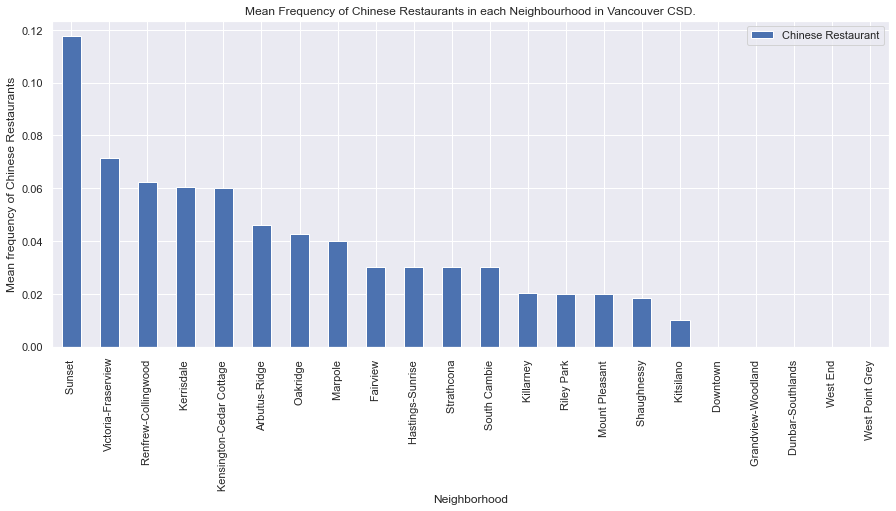

In [34]:
vancouver_grouped.set_index('Neighborhood', inplace=True)
vancouver_grouped.sort_values('Chinese Restaurant', axis=0, ascending=False, inplace=True)
vancouver_grouped.plot(kind='bar', figsize=(15, 6))

plt.xlabel('Neighborhood') # add to x-label to the plot
plt.ylabel('Mean frequency of Chinese Restaurants') # add y-label to the plot
plt.title('Mean Frequency of Chinese Restaurants in each Neighbourhood in Vancouver CSD.') # add title to the plot

plt.show()

The top 5 neighborhoods which has the highest mean frequency of Chinese Restaurants are :

1) Sunset

2) Renfrew-Collingwood

3) Victoria-Fraserview

4) Kerrisdale

5) Kensington-Cedar Cottage

These neighborhoods have higher competition for Chinese restaurants.
Thus, these neighborhoods will have lower priority when we are deciding the neighborhood to establish a new Chinese restaurant.

#### Next, let's analyze the total population and Chinese population percentage

<ipython-input-35-dbdfb81c2389>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vancouver_population.sort_values('Total Population', axis=0, ascending=False, inplace=True)


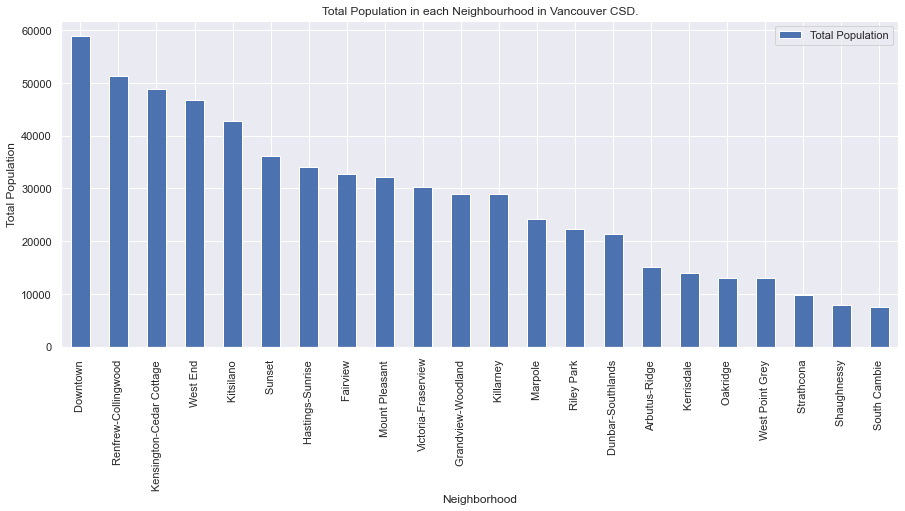

In [35]:
vancouver_population = neighborhood[['Neighborhood', 'Total Population']]
vancouver_population.set_index('Neighborhood', inplace=True)
vancouver_population.sort_values('Total Population', axis=0, ascending=False, inplace=True)
vancouver_population.plot(kind='bar', figsize=(15, 6))

plt.xlabel('Neighborhood') # add to x-label to the plot
plt.ylabel('Total Population') # add y-label to the plot
plt.title('Total Population in each Neighbourhood in Vancouver CSD.') # add title to the plot

plt.show()

The neighborhoods that have the highest population are :

1) Downtown

2) Renfrew-Collingwood

3) Kensington-Cedar Cottage

4) West End

5) Kitsilano

These neighborhoods have high population which mean it will bring in more business for a Restaurant.

<ipython-input-36-c0fcc5dd4fad>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vancouver_chinese.sort_values('Percentage of Chinese Population', axis=0, ascending=False, inplace=True)


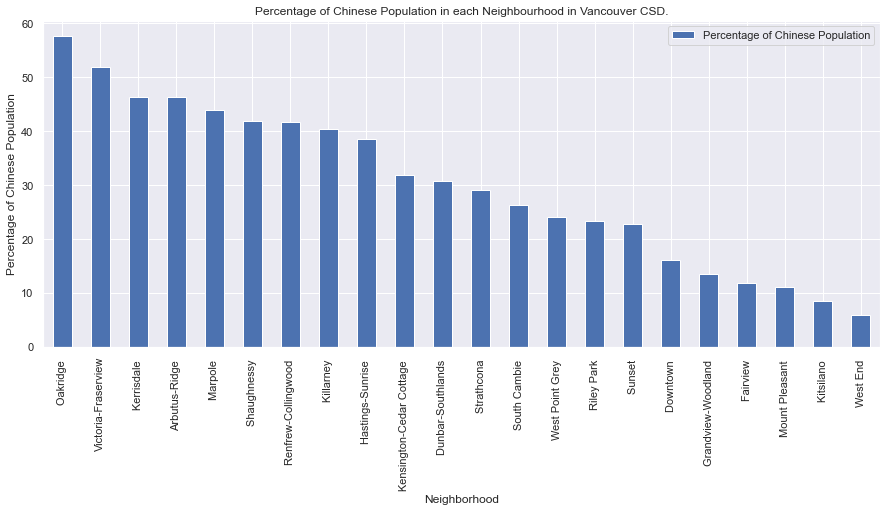

In [36]:
vancouver_chinese = neighborhood[['Neighborhood', 'Percentage of Chinese Population']]
vancouver_chinese.set_index('Neighborhood', inplace=True)
vancouver_chinese.sort_values('Percentage of Chinese Population', axis=0, ascending=False, inplace=True)
vancouver_chinese.plot(kind='bar', figsize=(15, 6))

plt.xlabel('Neighborhood') # add to x-label to the plot
plt.ylabel('Percentage of Chinese Population') # add y-label to the plot
plt.title('Percentage of Chinese Population in each Neighbourhood in Vancouver CSD.') # add title to the plot

plt.show()

The top 5 neighborhoods that have the percentage of Chinese people are :

1) Oakridge

2) Victoria-Fraserview

3) Kerrisdale

4) Arbutus-Ridge

5) Marpole

These neighborhoods have high percentage of Chinese people staying. And it means that we might get more business since Chinese people will usually prefer Chinese foods more.

#### Finally, let's visualize the household income in Vancouver CSD.

<ipython-input-37-04aac35858c5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vancouver_income.sort_values('Median Household Income', axis=0, ascending=False, inplace=True)


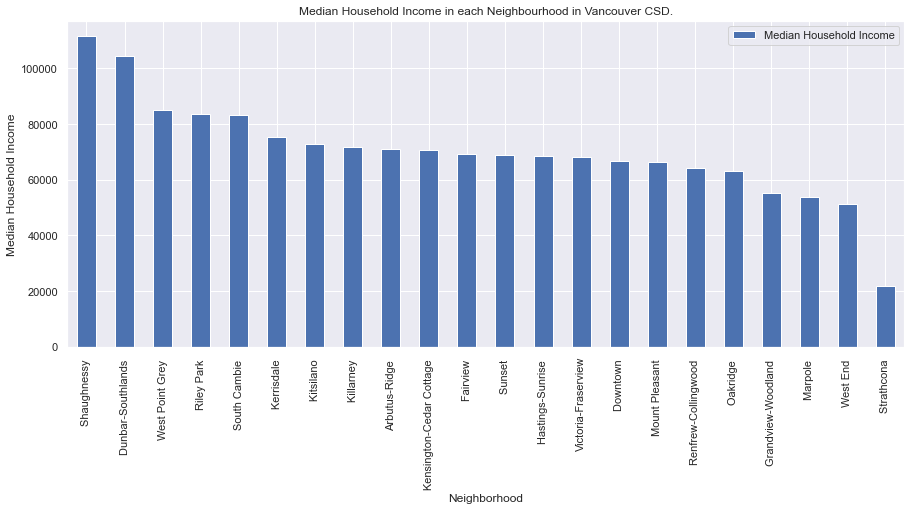

In [37]:
vancouver_income = neighborhood[['Neighborhood', 'Median Household Income']]
vancouver_income.set_index('Neighborhood', inplace=True)
vancouver_income.sort_values('Median Household Income', axis=0, ascending=False, inplace=True)
vancouver_income.plot(kind='bar', figsize=(15, 6))

plt.xlabel('Neighborhood') # add to x-label to the plot
plt.ylabel('Median Household Income') # add y-label to the plot
plt.title('Median Household Income in each Neighbourhood in Vancouver CSD.') # add title to the plot

plt.show()

The top 5 neighborhoods which has the highest mean frequency of Chinese Restaurants are :

1) Shaughnessy

2) Dunbar-Southlands

3) West Point Grey

4) Riley Park

5) South Cambie

The people who stay in the above neighborhoods have higher household income.
The people in these neighborhoods will have higher spending power.

### Clustering Vancouver Neighborhoods

Set inputs X

In [38]:
X = neighborhood.iloc[:,3:]
X_standardized = StandardScaler().fit_transform(X)
X_standardized = pd.DataFrame(X_standardized, columns=[new_cols[3:]])
X_standardized

,Total Population,Percentage of Chinese Population,Median Household Income,Chinese Restaurant
0,-0.896217,1.092199,0.040830,0.485300
1,2.098927,-0.950758,-0.211140,-1.127317
2,-0.471369,0.035132,1.945098,-1.127317
3,0.311281,-1.243439,-0.054320,-0.079116
4,0.056783,-1.135990,-0.862675,-1.127317
5,0.406376,0.564528,-0.101640,-0.079116
6,1.415818,0.115476,0.029840,0.969085
7,-0.976945,1.102247,0.292003,0.990261
8,0.051652,0.692121,0.072206,-0.414255
9,0.997469,-1.471093,0.145092,-0.777917


In [39]:
kmeans = KMeans(4)
kmeans.fit(X_standardized)

KMeans(n_clusters=4)

Find the best number of cluster (i) with the elbow method to find the lowest change in Within-Cluster Sum of Square (WCSS).

In [40]:
wcss = []
for i in range (1,11):
    kmeans = KMeans(i)
    kmeans.fit(X_standardized)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

The Elbow Method

Text(0, 0.5, 'Within-Cluster Sum of Squares')

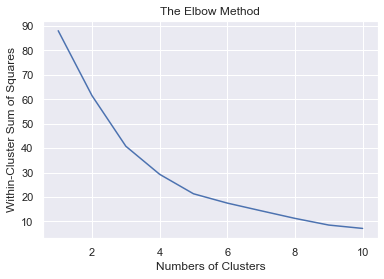

In [41]:
numbers_clusters = range(1,11)
plt.plot(numbers_clusters, wcss)
plt.title('The Elbow Method')
plt.xlabel('Numbers of Clusters')
plt.ylabel('Within-Cluster Sum of Squares')

The elbow method shows that the best number of clusters is 5.

In [42]:
# Conduct clustering with the best number of clusters 5.
no_clusters = 5

kmeans = KMeans(no_clusters, random_state = 42)
kmeans.fit(X_standardized)
kmeans.labels_

array([1, 2, 0, 2, 2, 1, 4, 1, 1, 2, 1, 2, 1, 4, 0, 0, 0, 3, 4, 1, 2, 0])

In [43]:
# Get the cluster label for each neighborhood in Vancouver CSD.
cluster = kmeans.fit_predict(X_standardized)
cluster

array([1, 2, 0, 2, 2, 1, 4, 1, 1, 2, 1, 2, 1, 4, 0, 0, 0, 3, 4, 1, 2, 0])

In [44]:
neighborhood.loc[:,'Cluster'] = cluster
neighborhood

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,Neighborhood,Latitude,Longitude,Total Population,Percentage of Chinese Population,Median Household Income,Chinese Restaurant,Cluster
0,Arbutus-Ridge,49.246305,-123.159636,15075,46.2355,71008,0.046154,1
1,Downtown,49.283393,-123.117456,58855,16.1244,66583,0.000000,2
2,Dunbar-Southlands,49.237864,-123.184354,21285,30.6554,104450,0.000000,0
3,Fairview,49.261956,-123.130408,32725,11.8105,69337,0.030000,2
4,Grandview-Woodland,49.275849,-123.066934,29005,13.3942,55141,0.000000,2
5,Hastings-Sunrise,49.277830,-123.040005,34115,38.4582,68506,0.030000,1
6,Kensington-Cedar Cottage,49.247632,-123.084207,48870,31.8396,70815,0.060000,4
7,Kerrisdale,49.220985,-123.159548,13895,46.3836,75419,0.060606,1
8,Killarney,49.218012,-123.037115,28930,40.3387,71559,0.020408,1
9,Kitsilano,49.269410,-123.155267,42755,8.45515,72839,0.010000,2


In [45]:
# create map
map_vancouver_cluster = folium.Map(location=[vcv_latitude, vcv_longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(no_clusters)
ys = [i + x + (i*x)**2 for i in range(no_clusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(neighborhood['Latitude'], neighborhood['Longitude'], neighborhood['Neighborhood'], neighborhood['Cluster']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_vancouver_cluster)
       
map_vancouver_cluster

Identify the neighborhood in each cluster.

In [46]:
neighborhood.loc[neighborhood['Cluster'] == 0]

,Neighborhood,Latitude,Longitude,Total Population,Percentage of Chinese Population,Median Household Income,Chinese Restaurant,Cluster
2,Dunbar-Southlands,49.237864,-123.184354,21285,30.6554,104450,0.000000,0
14,Riley Park,49.244854,-123.103035,22365,23.2953,83513,0.020000,0
15,Shaughnessy,49.246305,-123.138405,7990,41.8023,111566,0.018519,0
16,South Cambie,49.246464,-123.121603,7565,26.3714,83111,0.030000,0
21,West Point Grey,49.268102,-123.202643,12925,23.9845,84951,0.000000,0


Cluster 0 : Low Chinese population, high spending power and low restaurant competition.

In [47]:
neighborhood.loc[neighborhood['Cluster'] == 1]

,Neighborhood,Latitude,Longitude,Total Population,Percentage of Chinese Population,Median Household Income,Chinese Restaurant,Cluster
0,Arbutus-Ridge,49.246305,-123.159636,15075,46.2355,71008,0.046154,1
5,Hastings-Sunrise,49.277830,-123.040005,34115,38.4582,68506,0.030000,1
7,Kerrisdale,49.220985,-123.159548,13895,46.3836,75419,0.060606,1
8,Killarney,49.218012,-123.037115,28930,40.3387,71559,0.020408,1
10,Marpole,49.209223,-123.136150,24135,43.8575,53782,0.040000,1
12,Oakridge,49.226615,-123.122943,13025,57.62,62988,0.042553,1
19,Victoria-Fraserview,49.218980,-123.063816,30235,51.9596,68126,0.071429,1


Cluster 1 : Medium chinese population, medium spending power and medium restaurant competition.

In [48]:
neighborhood.loc[neighborhood['Cluster'] == 2]

,Neighborhood,Latitude,Longitude,Total Population,Percentage of Chinese Population,Median Household Income,Chinese Restaurant,Cluster
1,Downtown,49.283393,-123.117456,58855,16.1244,66583,0.00,2
3,Fairview,49.261956,-123.130408,32725,11.8105,69337,0.03,2
4,Grandview-Woodland,49.275849,-123.066934,29005,13.3942,55141,0.00,2
9,Kitsilano,49.269410,-123.155267,42755,8.45515,72839,0.01,2
11,Mount Pleasant,49.264048,-123.096249,32230,11.1077,66299,0.02,2
20,West End,49.284131,-123.131795,46720,5.86473,51410,0.00,2


Cluster 2 : Low chinese population, medium spending power and low restaurant competition.

In [49]:
neighborhood.loc[neighborhood['Cluster'] == 3]

,Neighborhood,Latitude,Longitude,Total Population,Percentage of Chinese Population,Median Household Income,Chinese Restaurant,Cluster
17,Strathcona,49.277693,-123.088539,9855,29.0715,21964,0.03,3


Cluster 3 : Low Chinese population, low spending power and low restaurant competition.

In [50]:
neighborhood.loc[neighborhood['Cluster'] == 4]

,Neighborhood,Latitude,Longitude,Total Population,Percentage of Chinese Population,Median Household Income,Chinese Restaurant,Cluster
6,Kensington-Cedar Cottage,49.247632,-123.084207,48870,31.8396,70815,0.060000,4
13,Renfrew-Collingwood,49.258945,-123.045255,51220,41.722,64179,0.062500,4
18,Sunset,49.219093,-123.091665,36075,22.675,68855,0.117647,4


Cluster 4 : High Chinese population, medium spending power but high restaurant competition.

In [51]:
summary = pd.DataFrame(data = [[0, 'Low', 'High', 'Low'], 
                               [1, 'Medium', 'Medium', 'Medium'], 
                               [2, 'Low', 'Medium', 'Low'], 
                               [3, 'Low', 'Low', 'Low'], 
                               [4, 'High', 'Medium', 'High']],
                       columns = ['Cluster', 'Chinese Population', 'Household Income', 'Chinese Restaurant'])
summary

,Cluster,Chinese Population,Household Income,Chinese Restaurant
0,0,Low,High,Low
1,1,Medium,Medium,Medium
2,2,Low,Medium,Low
3,3,Low,Low,Low
4,4,High,Medium,High


In [52]:
summary = summary.rename(columns={"Household Income": "Spending Power", "Chinese Restaurant": "Competition"})
summary

,Cluster,Chinese Population,Spending Power,Competition
0,0,Low,High,Low
1,1,Medium,Medium,Medium
2,2,Low,Medium,Low
3,3,Low,Low,Low
4,4,High,Medium,High


In [53]:
final_result = pd.DataFrame({'Neighborhood' : neighborhood['Neighborhood'].loc[neighborhood['Cluster'] == 1], 'Cluster' : 1, 'Priority' : 'First'})
final_result1 = pd.DataFrame({'Neighborhood' : neighborhood['Neighborhood'].loc[neighborhood['Cluster'] == 4], 'Cluster' : 4, 'Priority' : 'Second'})
final_result = final_result.append(final_result1, ignore_index = True)
final_result

,Neighborhood,Cluster,Priority
0,Arbutus-Ridge,1,First
1,Hastings-Sunrise,1,First
2,Kerrisdale,1,First
3,Killarney,1,First
4,Marpole,1,First
5,Oakridge,1,First
6,Victoria-Fraserview,1,First
7,Kensington-Cedar Cottage,4,Second
8,Renfrew-Collingwood,4,Second
9,Sunset,4,Second


### Reference :
1) Census local area profiles 2016 of Vancouver CSD :- https://opendata.vancouver.ca/explore/dataset/census-local-area-profiles-2016/information/

2) Foursquare API :- https://developer.foursquare.com/
